# LetsGrowMore VIP Data Science 


# By Nikita Bagwe


## Beginner Level Task : 
## 1) Iris Flower Classification ML project


#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

#### Importing Dataset

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')


In [3]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
df.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [5]:
columns = ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width' , 'class']

In [6]:
df.columns = columns

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


#### Learning The Data

In [8]:
df.shape

(149, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### missing values

In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

* There are no null values in any of the columns *

#### Data Visualization

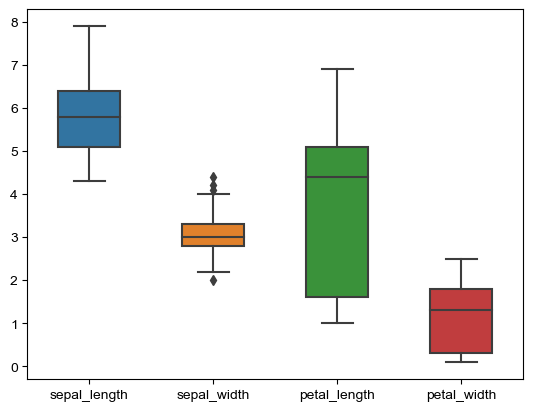

In [12]:
sns.boxplot(data = df, width = 0.5, fliersize = 5)
sns.set(rc = {"figure.figsize" :(6,6)})

* Exploring the correlation between different columns *

#### Heatmap

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

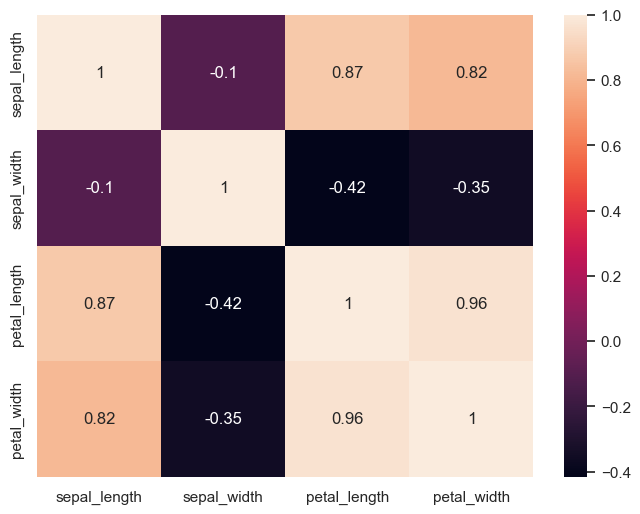

In [13]:
corr = df.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr , annot=True)
df.columns

* Seeing the heatmap we can see the correlation between different features that affect the data. Petal length and petal width gives similar information *

#### Violin plot

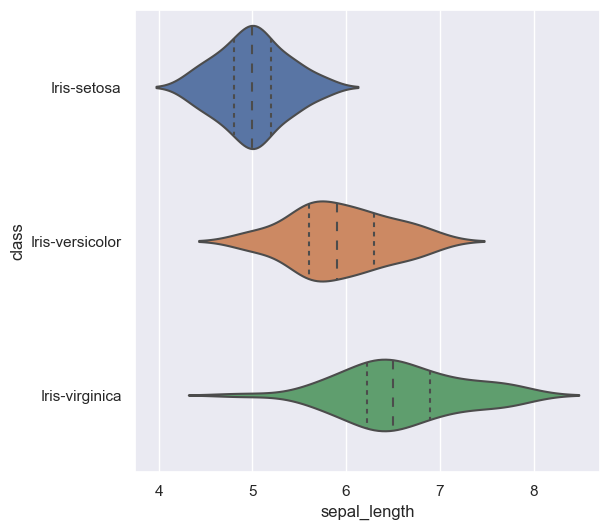

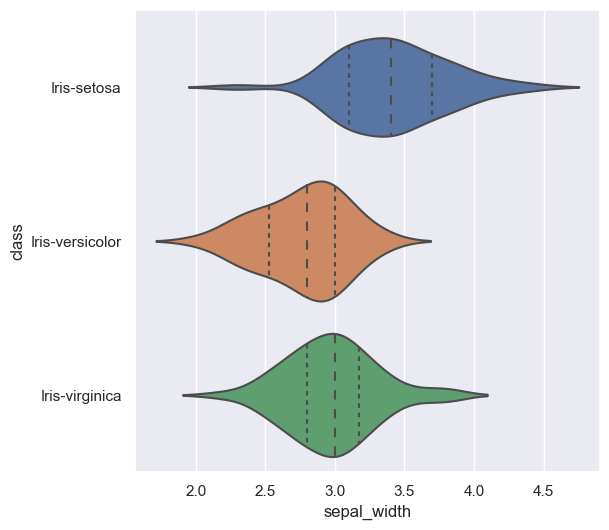

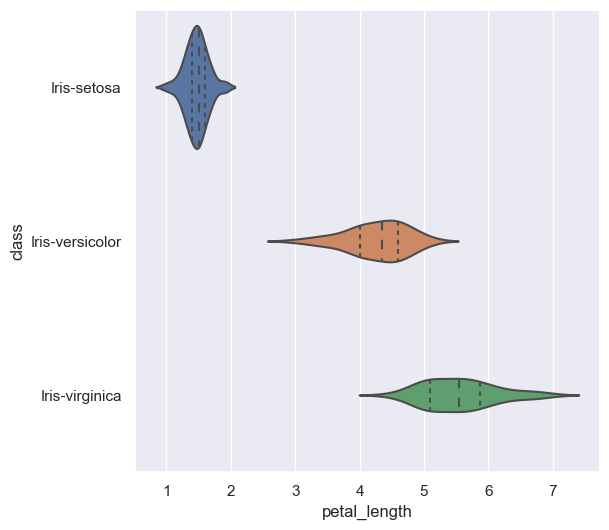

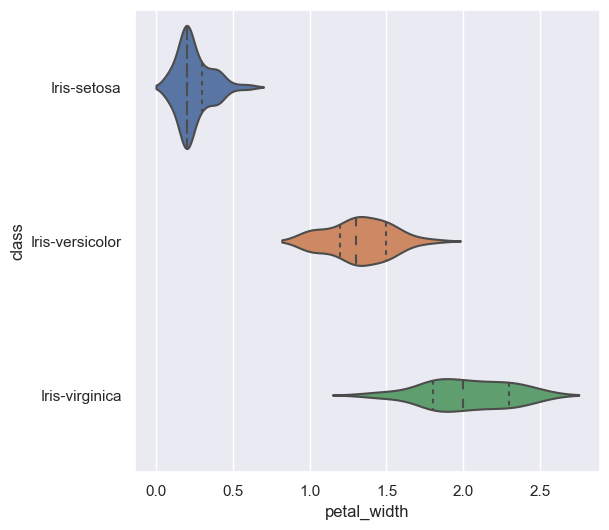

In [14]:
sns.violinplot (y = 'class' , x = 'sepal_length' , data = df , inner = 'quartile')
plt.show()
sns.violinplot (y = 'class' , x = 'sepal_width' , data = df , inner = 'quartile')
plt.show()
sns.violinplot (y = 'class' , x = 'petal_length' , data = df , inner = 'quartile')
plt.show()
sns.violinplot (y = 'class' , x = 'petal_width' , data = df , inner = 'quartile')
plt.show()

* The above plotted violin plot gives information that Iris-Setosa class is having a smaller petal lengthand petal width compared to other class *

#### Model Building - PART 01

* As we have measurements for which we know the correct species of iris ,this is supervised learning problem. We want to predict one of the options of species of iris, making it an example of classification problem. *
* For testing model's performance , we split the collected labelled data in two parts - training set and testing set*

#### X is having dependent variables and Y is having independent variable (class)

In [15]:
X = df.drop(['class'], axis = 1)
y = df['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (149, 4) | y shape: (149,) 


#### Train Test Split

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size = 0.10 , random_state = 1)

#### Model creation 
   ###### Train SVC model on our training set and predict on test set in next step 

In [17]:
model = []
model.append(('SVC' , SVC(gamma = 'auto')))

#### Model Building - PART 02

In [18]:
model = SVC(gamma = 'auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

* We define our SVC model and pass gamma as auto .Then we fit using fit() method and prediction is done*

#### Checking accuracy of the model

In [19]:
print(f'Test Accuracy: {accuracy_score(y_test , prediction)}')
print(f'Classification Report: \n {classification_report(y_test , prediction)}')

Test Accuracy: 0.9333333333333333
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         4
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.50      0.67         2

       accuracy                           0.93        15
      macro avg       0.97      0.83      0.87        15
   weighted avg       0.94      0.93      0.92        15



#### Hence we get accuracy as 93% which is good ,it means our model can be used